In [1]:
import pandas as pd



bitcoin_users_file = "/Users/michal/Downloads/bitcoin.stackexchange.com/Users.xml"
cardano_users_file = "/Users/michal/Downloads/cardano.stackexchange.com/Users.xml"
solana_users_file = "/Users/michal/Downloads/solana.stackexchange.com/Users.xml"
ethereum_users_file = "/Users/michal/Downloads/ethereum.stackexchange.com/Users.xml"



In [8]:
df_users_btc = pd.read_xml(bitcoin_users_file)
df_users_ada = pd.read_xml(cardano_users_file)
df_users_sol = pd.read_xml(solana_users_file)
df_users_eth = pd.read_xml(ethereum_users_file)

df_users_btc["CreationDate"] = pd.to_datetime(df_users_btc["CreationDate"])
df_users_btc["LastAccessDate"] = pd.to_datetime(df_users_btc["LastAccessDate"])

df_users_ada["CreationDate"] = pd.to_datetime(df_users_ada["CreationDate"])
df_users_ada["LastAccessDate"] = pd.to_datetime(df_users_ada["LastAccessDate"])

df_users_sol["CreationDate"] = pd.to_datetime(df_users_sol["CreationDate"])
df_users_sol["LastAccessDate"] = pd.to_datetime(df_users_sol["LastAccessDate"])

df_users_eth["CreationDate"] = pd.to_datetime(df_users_eth["CreationDate"])
df_users_eth["LastAccessDate"] = pd.to_datetime(df_users_eth["LastAccessDate"])

In [7]:
df_users_sol

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,WebsiteUrl
0,-1,1,2022-07-12T20:00:00.000,Community,2022-07-12T20:00:00.000,on the server farm,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",13,0,48,-1.0,None
1,1,101,2022-07-12T21:11:36.417,Adam Lear,2023-11-20T23:00:38.940,"New York, NY",\n<p>Developer at Stack Overflow focusing on p...,9,0,0,37099.0,None
2,2,100,2022-07-12T21:12:49.533,Henry WH Hack v3.0,2023-07-22T16:19:53.563,Stack Exchange,<p><strong>If you have to make a complaint abo...,9,0,6,7238091.0,https://stackexchange.com
3,3,75,2022-07-12T21:14:27.753,amaz_ng,2023-09-10T03:45:32.163,None,None,9,0,0,23924045.0,None
4,4,1,2022-07-12T21:14:37.807,Jhs,2022-07-21T16:40:58.297,None,None,5,0,0,24409327.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
6627,6661,1,2023-12-02T20:28:36.717,Joe,2023-12-02T20:28:36.717,None,None,0,0,0,30050550.0,None
6628,6662,1,2023-12-02T21:37:45.957,Crypto Rush Office,2023-12-02T21:37:45.957,None,None,0,0,0,30050872.0,None
6629,6663,1,2023-12-03T01:27:27.733,Dandi Fandes,2023-12-03T01:27:27.733,None,None,0,0,0,30051605.0,None
6630,6664,1,2023-12-03T01:45:49.793,Pankaj Deori,2023-12-03T01:45:49.793,None,None,0,0,0,30051668.0,None


<Axes: xlabel='CreationDate'>

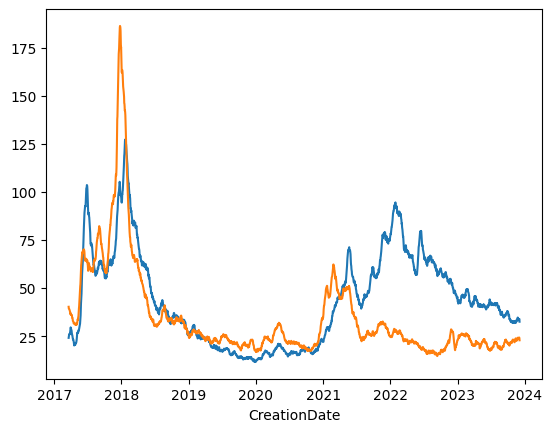

In [50]:
# Filter the dataframe based on the desired date range
start_date = '2017-03-01'
users_btc = df_users_btc[(df_users_btc['CreationDate'] >= start_date)]
users_eth= df_users_eth[(df_users_eth['CreationDate'] >= start_date)]
users_ada = df_users_ada[(df_users_ada['CreationDate'] >= start_date)]
users_sol = df_users_sol[(df_users_sol['CreationDate'] >= start_date)]

creationDateGroupedBtc = users_btc.groupby(users_btc['CreationDate'].dt.date).size()
# creationDateGroupedBtc.plot()
# creationDateGroupedSol = df_users_sol.groupby(df_users_sol['CreationDate'].dt.date).size().plot()
# creationDateGroupedAda = df_users_ada.groupby(df_users_ada['CreationDate'].dt.date).size().plot()
creationDateGroupedEth = users_eth.groupby(users_eth['CreationDate'].dt.date).size()
# creationDateGroupedEth.plot()
# Apply moving average






window_size = 20
rolling_mean_eth = creationDateGroupedEth.rolling(window_size).mean()
rolling_mean_eth.plot()
rolling_mean_btc = creationDateGroupedBtc.rolling(window_size).mean()
rolling_mean_btc.plot()




In [47]:
minUsersCreatedBtc = creationDateGroupedBtc.min()
maxUsersCreatedBtc = creationDateGroupedBtc.max()
differenceInCreatedUsersBtc = maxUsersCreatedBtc - minUsersCreatedBtc

# minPriceEth = eth_historical['Open'].min()
# maxPriceEth = eth_historical['Open'].max()
# differencePriceEth = maxPriceEth - minPriceEth
# bitcoin_historical_zeroONe = bitcoin_historical.copy()["priceZeroOne"] == (bitcoin_historical["price"]-minPrice)/differencePrice
differenceInCreatedUsersBtc = (creationDateGroupedBtc.values - minUsersCreatedBtc) / differenceInCreatedUsersBtc
# eth_historical['priceZero'] = (eth_historical['Open'] - minPriceEth) / differencePriceEth


window_size = 20
# rolling_mean_eth = creationDateGroupedEth.rolling(window_size).mean()
# rolling_mean_eth.plot()
rolling_mean_btc = differenceInCreatedUsersBtc.rolling(window_size).mean()
rolling_mean_btc.plot()


AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

<Axes: xlabel='Date'>

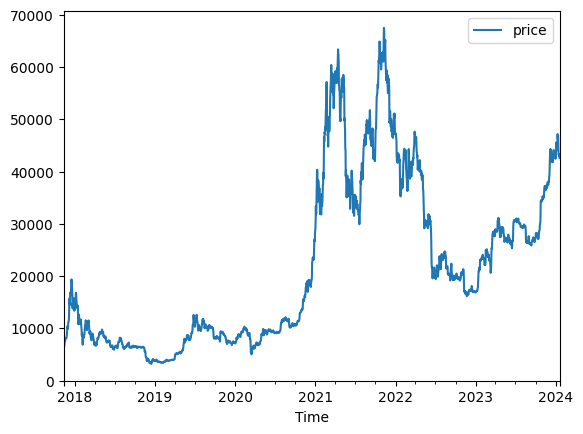

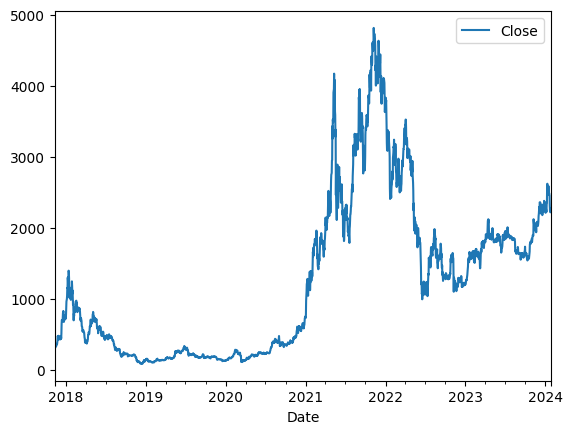

In [20]:
start_date = '2017-11-11'

bitcoin_historical = pd.read_csv("./historical_prices/bitcoin_data.csv")

bitcoin_historical['Time'] = pd.to_datetime(bitcoin_historical['Time'])
bitcoin_historical = bitcoin_historical[bitcoin_historical['Time'] >= start_date]

bitcoin_historical['Derivative'] = bitcoin_historical['price'].diff()
bitcoin_historical['RelativeChange'] = bitcoin_historical['Derivative']/(bitcoin_historical['price'].rolling(20).mean())
bitcoin_historical.plot(x='Time', y='price', kind='line')


eth_historical = pd.read_csv("./historical_prices/ETH-USD.csv")


eth_historical['Date'] = pd.to_datetime(eth_historical['Date'])
eth_historical = eth_historical[eth_historical['Date'] >= start_date]
eth_historical['Derivative'] = eth_historical['Close'].diff()
eth_historical['RelativeChange'] = eth_historical['Derivative']/(eth_historical['Close'].rolling(20).mean())
eth_historical.plot(x='Date', y='Close', kind='line')



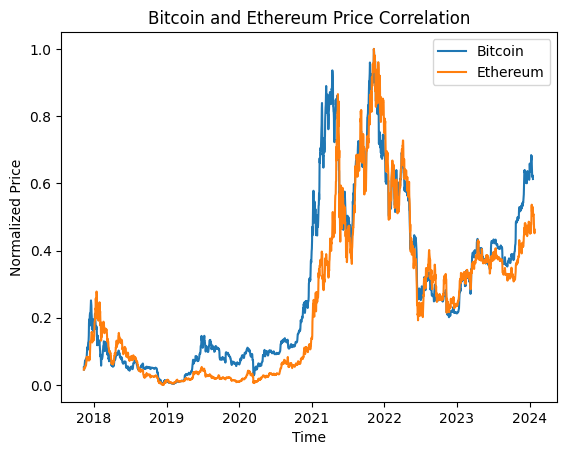

In [36]:
minPriceBtc = bitcoin_historical['price'].min()
maxPriceBtc = bitcoin_historical['price'].max()
differencePriceBtc = maxPriceBtc - minPriceBtc

minPriceEth = eth_historical['Open'].min()
maxPriceEth = eth_historical['Open'].max()
differencePriceEth = maxPriceEth - minPriceEth
# bitcoin_historical_zeroONe = bitcoin_historical.copy()["priceZeroOne"] == (bitcoin_historical["price"]-minPrice)/differencePrice
bitcoin_historical['priceZero'] = (bitcoin_historical['price'] - minPriceBtc) / differencePriceBtc
eth_historical['priceZero'] = (eth_historical['Open'] - minPriceEth) / differencePriceEth

# bitcoin_historical.plot(x='Time', y='priceZero', kind='line', title="Bitcoin price")
# eth_historical.plot(x='Date', y='priceZero', kind='line', title="Ethereum price")

import matplotlib.pyplot as plt

plt.plot(bitcoin_historical['Time'], bitcoin_historical['priceZero'], label='Bitcoin')
plt.plot(eth_historical['Date'], eth_historical['priceZero'], label='Ethereum')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Bitcoin and Ethereum Price Correlation')
plt.legend()
plt.show()


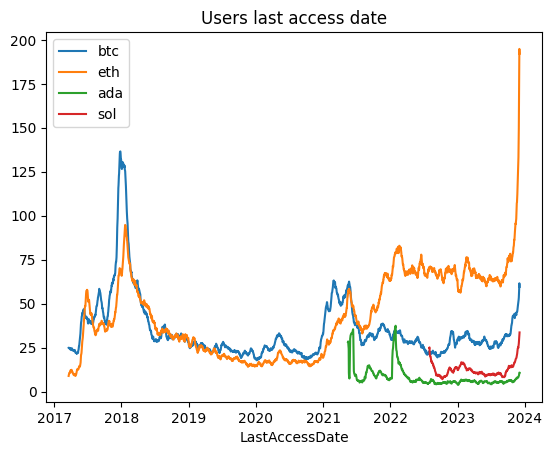

In [62]:
creationDateGroupedBtc = users_btc.groupby(users_btc['CreationDate'].dt.date).size()
lastAccessDateGroupedBtc = users_btc.groupby(users_btc['LastAccessDate'].dt.date).size()

window_size = 20
# rolling_mean_eth = creationDateGroupedEth.rolling(window_size).mean()
# rolling_mean_eth.plot()
rolling_users_last_access_btc = lastAccessDateGroupedBtc.rolling(window_size).mean()
rolling_users_last_access_btc.plot(label='btc')

creationDateGroupedEth = users_eth.groupby(users_eth['CreationDate'].dt.date).size()
lastAccessDateGroupedEth = users_eth.groupby(users_eth['LastAccessDate'].dt.date).size()
rolling_users_last_access_eth = lastAccessDateGroupedEth.rolling(window_size).mean()
rolling_users_last_access_eth.plot(label='eth')

creationDateGroupedAda = users_ada.groupby(users_ada['CreationDate'].dt.date).size()
lastAccessDateGroupedAda = users_ada.groupby(users_ada['LastAccessDate'].dt.date).size()
rolling_users_last_access_ada = lastAccessDateGroupedAda.rolling(window_size).mean()
rolling_users_last_access_ada.plot(label='ada')

creationDateGroupedSol = users_sol.groupby(users_sol['CreationDate'].dt.date).size()
lastAccessDateGroupedSol = users_sol.groupby(users_sol['LastAccessDate'].dt.date).size()
rolling_users_last_access_sol = lastAccessDateGroupedSol.rolling(window_size).mean()
rolling_users_last_access_sol.plot(label='sol')


plt.title('Users last access date')

plt.legend()



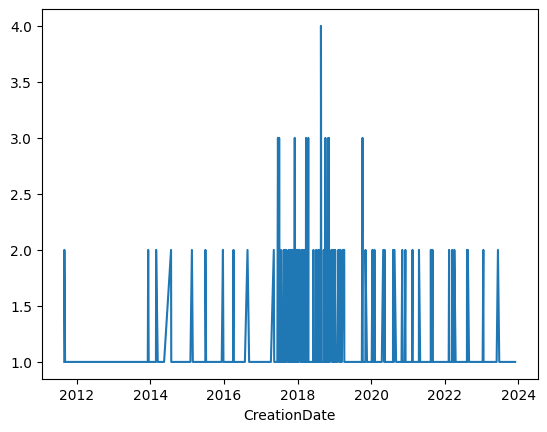